# Preliminary instruction

To follow the code in this chapter, the `yfinance` package must be installed in your environment. If you do not have this installed yet, review Chapter 4 for instructions on how to do so.

# CHAPTER 5: Regime Definition 


In [1]:
# CHAPTER 5:Regime Definition 

# Import Libraries
import pandas as pd
import numpy as np
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

### Plot multiple regime methodologies in a colorful chart

In [2]:
ticker = 'FB'

# CHAPTER 5: Regime Definition 

### Graph Regimes ###
def graph_regime_combo(ticker,df,_c,rg,lo,hi,slo,shi,clg,flr,rg_ch,
                       ma_st,ma_mt,ma_lt,lt_lo,lt_hi,st_lo,st_hi):
    
    '''
    https://www.color-hex.com/color-names.html
    ticker,df,_c: _c is closing price
    rg: regime -1/0/1 using floor/ceiling method
    lo,hi: small, noisy highs/lows
    slo,shi: swing lows/highs
    clg,flr: ceiling/floor
    
    rg_ch: regime change base
    ma_st,ma_mt,ma_lt: moving averages ST/MT/LT
    lt_lo,lt_hi: range breakout High/Low LT 
    st_lo,st_hi: range breakout High/Low ST 
    '''
    fig = plt.figure(figsize=(20,8))
    ax1 = plt.subplot2grid((1,1), (0,0))
    date = df.index
    close = df[_c]
    ax1.plot_date(df.index, close,'-', color='k',  label=ticker.upper()) 
    try:
        if pd.notnull(rg):  
            base = df[rg_ch]
            regime = df[rg]

            if df[lo].count()>0:
                ax1.plot(df.index, df[lo],'.' ,color='r', label= 'swing low',alpha= 0.6)
            if df[hi].count()>0:
                ax1.plot(df.index, df[hi],'.' ,color='g', label= 'swing high',alpha= 0.6)        
            if df[slo].count()>0:
                ax1.plot(df.index, df[slo],'o' ,color='r', label= 'swing low',alpha= 0.8)
            if df[shi].count()>0:
                ax1.plot(df.index, df[shi],'o' ,color='g', label= 'swing high',alpha= 0.8)
            if df[flr].count()>0:
                plt.scatter(df.index, df[flr],c='k',marker='^',label='floor')
            if df[clg].count() >0:
                plt.scatter(df.index, df[clg],c='k',marker='v',label='ceiling')

            ax1.plot([],[],linewidth=5, label= 'bear', color='m',alpha=0.1)
            ax1.plot([],[],linewidth=5 , label= 'bull', color='b',alpha=0.1)
            ax1.fill_between(date, close, base,where=((regime==1)&(close > base)), facecolor='b', alpha=0.1)
            ax1.fill_between(date, close, base,where=((regime==1)&(close < base)), facecolor='b', alpha=0.4)
            ax1.fill_between(date, close, base,where=((regime==-1)&(close < base)), facecolor='m', alpha=0.1)
            ax1.fill_between(date, close, base,where=((regime==-1)&(close > base)), facecolor='m', alpha=0.4)

        if np.sum(ma_st) >0 :
            ax1.plot(df.index,ma_st,'-' ,color='lime', label= 'ST MA')
            ax1.plot(df.index,ma_mt,'-' ,color='green', label= 'MT MA')
            ax1.plot(df.index,ma_lt,'-' ,color='red', label= 'LT MA')

            if pd.notnull(rg): # floor/ceiling regime present
                # Profitable conditions
                ax1.fill_between(date,close, ma_mt,where=((regime==1)&(ma_mt >= ma_lt)&(ma_st>=ma_mt)), 
                             facecolor='green', alpha=0.5) 
                ax1.fill_between(date,close, ma_mt,where=((regime==-1)&(ma_mt <= ma_lt)&(ma_st <= ma_mt)), 
                             facecolor='red', alpha=0.5)
                # Unprofitable conditions
                ax1.fill_between(date,close, ma_mt,where=((regime==1)&(ma_mt>=ma_lt)&(ma_st>=ma_mt)&(close<ma_mt)), 
                             facecolor='darkgreen', alpha=1) 
                ax1.fill_between(date,close, ma_mt,where=((regime==-1)&(ma_mt<=ma_lt)&(ma_st<=ma_mt)&(close>=ma_mt)), 
                             facecolor='darkred', alpha=1)

            elif pd.isnull(rg): # floor/ceiling regime absent
                 # Profitable conditions
                ax1.fill_between(date,close, ma_mt,where=((ma_mt >= ma_lt)&(ma_st>=ma_mt)), 
                             facecolor='green', alpha=0.4) 
                ax1.fill_between(date,close, ma_mt,where=((ma_mt <= ma_lt)&(ma_st <= ma_mt)), 
                             facecolor='red', alpha=0.4)
                # Unprofitable conditions
                ax1.fill_between(date,close, ma_mt,where=((ma_mt >= ma_lt)&(ma_st >= ma_mt)&(close < ma_mt)), 
                             facecolor='darkgreen', alpha=1) 
                ax1.fill_between(date,close, ma_mt,where=((ma_mt <= ma_lt)&(ma_st <= ma_mt)&(close >= ma_mt)), 
                             facecolor='darkred', alpha=1)

        if (np.sum(lt_hi) > 0): # LT range breakout
            ax1.plot([],[],linewidth=5, label= ' LT High', color='m',alpha=0.2)
            ax1.plot([],[],linewidth=5, label= ' LT Low', color='b',alpha=0.2)

            if pd.notnull(rg): # floor/ceiling regime present
                ax1.fill_between(date, close, lt_lo,
                                 where=((regime ==1) & (close > lt_lo) ), 
                                 facecolor='b', alpha=0.2)
                ax1.fill_between(date,close, lt_hi,
                                 where=((regime ==-1) & (close < lt_hi)), 
                                 facecolor='m', alpha=0.2)
                if (np.sum(st_hi) > 0): # ST range breakout
                    ax1.fill_between(date, close, st_lo,
                                     where=((regime ==1)&(close > st_lo) ), 
                                     facecolor='b', alpha=0.3)
                    ax1.fill_between(date,close, st_hi,
                                     where=((regime ==-1) & (close < st_hi)), 
                                     facecolor='m', alpha=0.3)

            elif pd.isnull(rg): # floor/ceiling regime absent           
                ax1.fill_between(date, close, lt_lo,
                                 where=((close > lt_lo) ), facecolor='b', alpha=0.2)
                ax1.fill_between(date,close, lt_hi,
                                 where=((close < lt_hi)), facecolor='m', alpha=0.2)
                if (np.sum(st_hi) > 0): # ST range breakout
                    ax1.fill_between(date, close, st_lo,
                                     where=((close > st_lo) & (st_lo >= lt_lo)), facecolor='b', alpha=0.3)
                    ax1.fill_between(date,close, st_hi,
                                     where=((close < st_hi)& (st_hi <= lt_hi)), facecolor='m', alpha=0.3)

            if (np.sum(st_hi) > 0): # ST range breakout
                ax1.plot([],[],linewidth=5, label= ' ST High', color='m',alpha=0.3)
                ax1.plot([],[],linewidth=5, label= ' ST Low', color='b',alpha=0.3)

            ax1.plot(df.index, lt_lo,'-.' ,color='b', label= 'LT low',alpha=0.2)
            ax1.plot(df.index, lt_hi,'-.' ,color='m', label= 'LT high',alpha=0.2)
    except:
        pass
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)
    ax1.xaxis.label.set_color('k')
    ax1.yaxis.label.set_color('k')
    plt.xlabel('Date')
    plt.ylabel(str.upper(ticker) + ' Price')
    plt.title(str.upper(ticker))
    plt.legend()
### Graph Regimes Combo ###


### Range breakout regime methodology
1. Function definition
2. OHLC download using yfinance
3. define regime
4. Plot: Softbank one year high/low regime breakout definition 

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'FB 252 days high/low'}, xlabel='Date'>

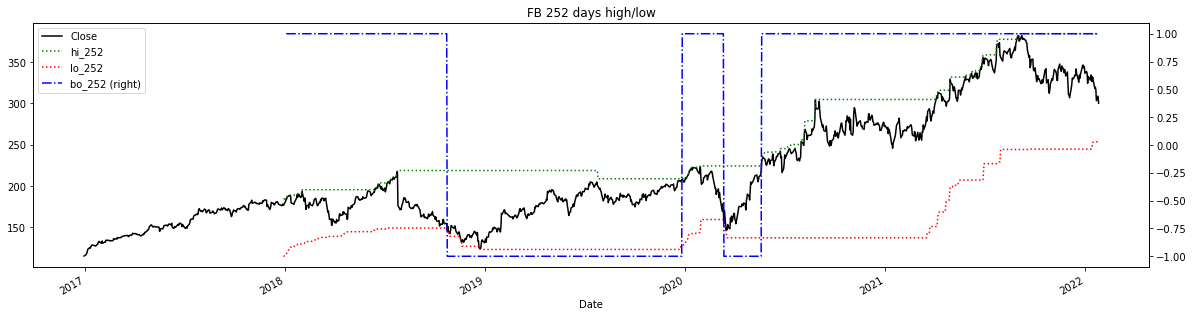

In [3]:
# CHAPTER 5: Regime Definition 


def regime_breakout(df,_h,_l,window):
    hl =  np.where(df[_h] == df[_h].rolling(window).max(),1,
                                np.where(df[_l] == df[_l].rolling(window).min(), -1,np.nan))
    roll_hl = pd.Series(index= df.index, data= hl).fillna(method= 'ffill')
    return roll_hl

#ticker = '9984.T' # Softbank
start= '2016-12-31'
end = None
df = yf.download(tickers= ticker,start= start, end = end,interval = "1d",
                 group_by = 'column',auto_adjust = True, prepost = True, 
                 treads = True, proxy = None)

window = 252
df['hi_'+str(window)] = df['High'].rolling(window).max()
df['lo_'+str(window)] = df['Low'].rolling(window).min()
df['bo_'+ str(window)]= regime_breakout(df= df,_h= 'High',_l= 'Low',window= window)
df[['Close','hi_'+str(window),'lo_'+str(window),'bo_'+ str(window)]].plot(secondary_y= ['bo_'+ str(window)],
                                figsize=(20,5), style=['k','g:','r:','b-.'],
                                 title = str.upper(ticker)+' '+str(window)+' days high/low')


### Utilities functions
1. lower_upper_OHLC: return _o,_h,_l,_c in small caps or title, absolute or relative
2. regime_args: returns regime definition arguments

In [4]:
def lower_upper_OHLC(df,relative = False):
    if relative==True:
        rel = 'r'
    else:
        rel= ''      
    if 'Open' in df.columns:
        ohlc = [rel+'Open',rel+'High',rel+'Low',rel+'Close']       
    elif 'open' in df.columns:
        ohlc = [rel+'open',rel+'high',rel+'low',rel+'close']
        
    try:
        _o,_h,_l,_c = [ohlc[h] for h in range(len(ohlc))]
    except:
        _o=_h=_l=_c= np.nan
    return _o,_h,_l,_c

def  regime_args(df,lvl,relative= False):
    if ('Low' in df.columns) & (relative == False):
        reg_val = ['Lo1','Hi1','Lo'+str(lvl),'Hi'+str(lvl),'rg','clg','flr','rg_ch']
    elif ('low' in df.columns) & (relative == False):
        reg_val = ['lo1','hi1','lo'+str(lvl),'hi'+str(lvl),'rg','clg','flr','rg_ch']
    elif ('Low' in df.columns) & (relative == True):
        reg_val = ['rL1','rH1','rL'+str(lvl),'rH'+str(lvl),'rrg','rclg','rflr','rrg_ch']
    elif ('low' in df.columns) & (relative == True):
        reg_val = ['rl1','rh1','rl'+str(lvl),'rh'+str(lvl),'rrg','rclg','rflr','rrg_ch']
    
    try: 
        rt_lo,rt_hi,slo,shi,rg,clg,flr,rg_ch = [reg_val[s] for s in range(len(reg_val))]
    except:
        rt_lo=rt_hi=slo=shi=rg=clg=flr=rg_ch= np.nan
    return rt_lo,rt_hi,slo,shi,rg,clg,flr,rg_ch

### Turtle for dummies
Turtle is an asymmetrical range breakout strategy:
1. Enter on longer duration: slow
2. Exit on faster duration: fast

Plot: Softbank with asymmetrical regime breakout duration (turtle traders for dummies)

<AxesSubplot:title={'center':"FB ['bo_50', 'bo_20', 'turtle_5020']"}, xlabel='Date'>

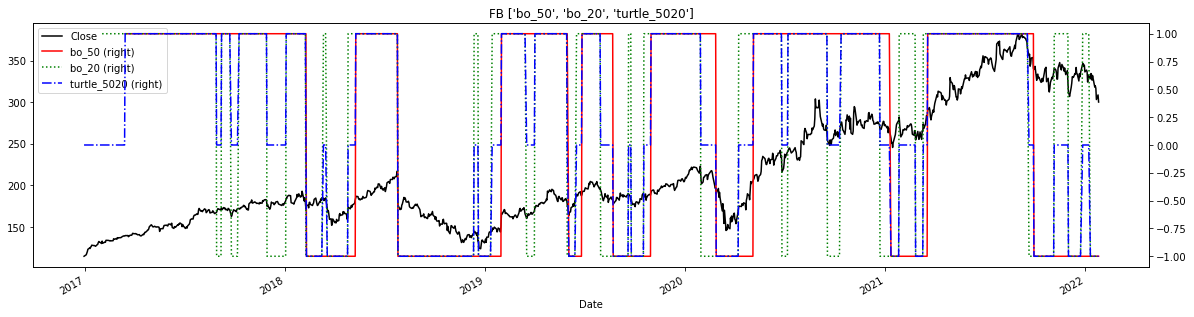

In [5]:
# CHAPTER 5: Regime Definition 


def turtle_trader(df, _h, _l, slow, fast):
    '''
    _slow: Long/Short direction
    _fast: trailing stop loss
    '''
    _slow = regime_breakout(df,_h,_l,window = slow)
    _fast = regime_breakout(df,_h,_l,window = fast)
    turtle = pd. Series(index= df.index, 
                        data = np.where(_slow == 1,np.where(_fast == 1,1,0), 
                                np.where(_slow == -1, np.where(_fast ==-1,-1,0),0)))
    return turtle
    
_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

fast = 20
slow = 50

df['bo_'+ str(slow)] = regime_breakout(df,_h,_l,window = slow)
df['bo_'+ str(fast)] = regime_breakout(df,_h,_l,window = fast)
df['turtle_'+ str(slow)+str(fast)] = turtle_trader(df, _h, _l, slow, fast)
rg_cols = ['bo_'+str(slow),'bo_'+ str(fast),'turtle_'+ str(slow)+str(fast)]

df[['Close','bo_'+str(slow),'bo_'+ str(fast),'turtle_'+ str(slow)+str(fast)] ].plot(
    secondary_y= rg_cols,figsize=(20,5), style=['k','r','g:','b-.'],
                                 title = str.upper(ticker)+' '+str(rg_cols))

Plot Softbank regime using Turtle Trader methodology using the graph_regime_combo function. The darker shade is the shorter timeframe

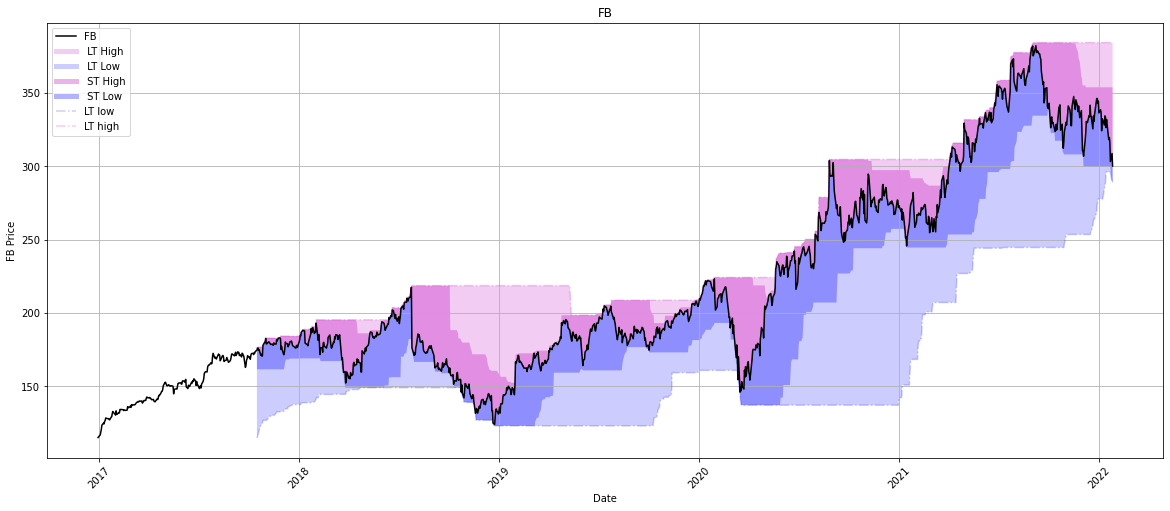

In [6]:
# CHAPTER 5: Regime Definition 
# EDWARD, this is for you bo_lt, bo_st

_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

ma_st = ma_mt = ma_lt = 0
rg=lo=hi=slo=shi=clg=flr=rg_ch = None

bo = [50, 200]
st_lo,lt_lo = [df[_l].rolling(window = bo[t]).min() for t in range(len(bo))]
st_hi,lt_hi = [df[_h].rolling(window = bo[t]).max() for t in range(len(bo))]

graph_regime_combo(ticker,df,_c,rg,lo,hi,slo,shi,clg,flr,rg_ch,ma_st,ma_mt,ma_lt,lt_lo,lt_hi,st_lo,st_hi)

### Moving average crossover
1. regime_sma: simple moving average crossover strategy
    1. Bullish: st > mt = 1
    2. Bearish: st < mt = -1
2. regime_ema: exponential moving average crossover strategy
    1. Bullish: st > mt = 1
    2. Bearish: st < mt = -1
    
3. Plot: Softbank regimes using turtle breakout, SMA, and EMA

<AxesSubplot:title={'center':"FB ['sma_50200', 'ema_50200', 'turtle_5020']"}, xlabel='Date'>

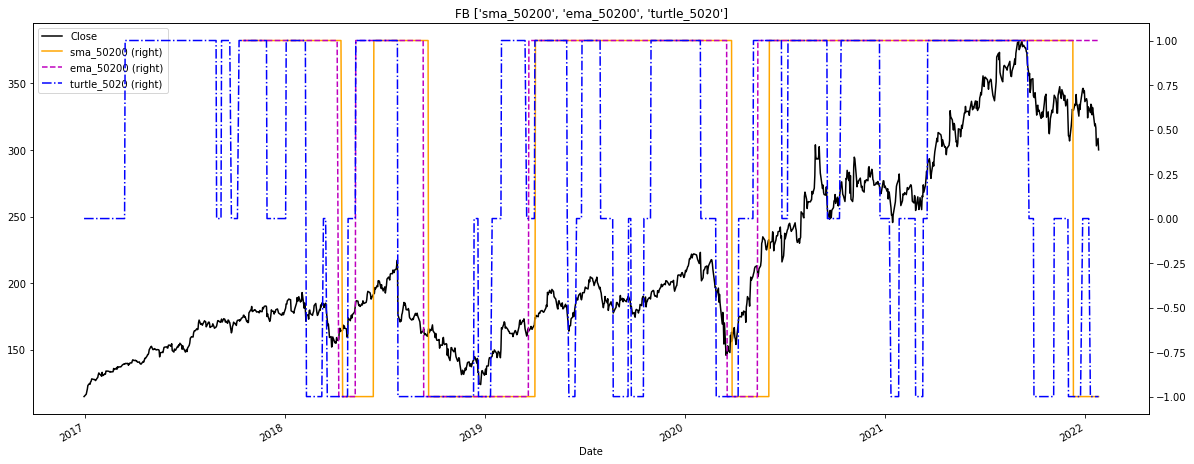

In [7]:
# CHAPTER 5: Regime Definition 

#### Regime SMA EMA ####
def regime_sma(df,_c,st,lt):
    '''
    bull +1: sma_st >= sma_lt , bear -1: sma_st <= sma_lt
    '''
    sma_lt = df[_c].rolling(lt).mean()
    sma_st = df[_c].rolling(st).mean()
    rg_sma = np.sign(sma_st - sma_lt)
    return rg_sma

def regime_ema(df,_c,st,lt):
    '''
    bull +1: ema_st >= ema_lt , bear -1: ema_st <= ema_lt
    '''
    ema_st = df[_c].ewm(span=st,min_periods = st).mean()
    ema_lt = df[_c].ewm(span=lt,min_periods = lt).mean()
    rg_ema = np.sign(ema_st - ema_lt)
    return rg_ema

st = 50
lt = 200
df['sma_' + str(st) + str(lt)] = regime_sma(df, _c='Close', st= st, lt= lt)
df['ema_' + str(st) + str(lt)] = regime_ema(df, _c='Close', st= st, lt= lt)

_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

rgme_cols = ['sma_' + str(st) + str(lt), 'ema_' + str(st) + str(lt),'turtle_'+ str(slow)+str(fast) ]
df[['Close','sma_' + str(st) + str(lt), 'ema_' + str(st) + str(lt),'turtle_'+ str(slow)+str(fast)] ].plot(
    secondary_y= rgme_cols,figsize=(20,8), style=['k','orange','m--','b-.'],
                                 title = str.upper(ticker)+' '+str(rgme_cols))

#### Colorful chart plot
PLot: Crossover on Softbank darker zones are loss-making areas

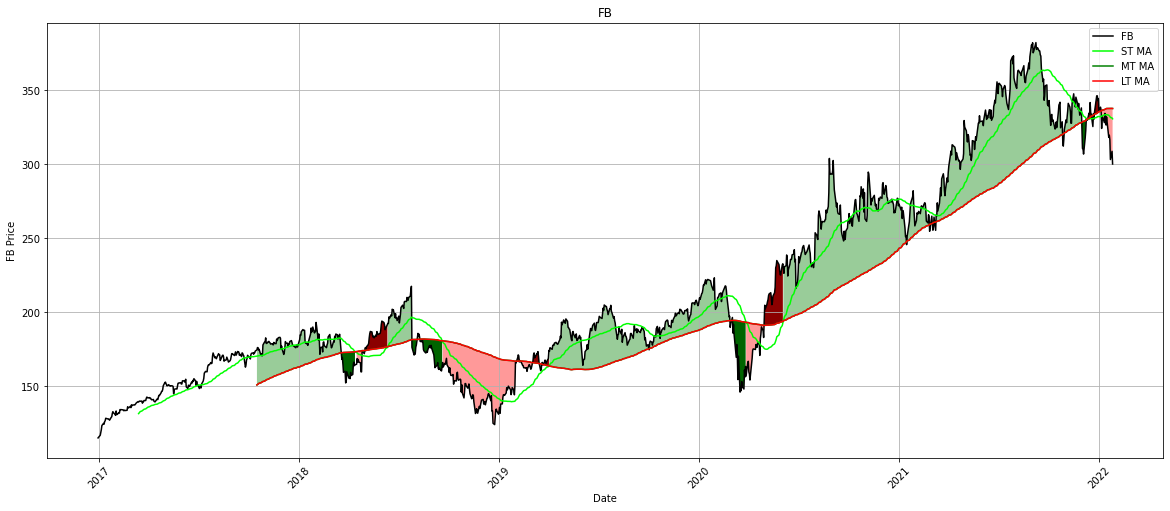

In [8]:
# CHAPTER 5: Regime Definition 

_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

rg=lo=hi=slo=shi=clg=flr=rg_ch = None
lt_lo = lt_hi = st_lo = st_hi = 0

ma_st = df[_c].rolling(window=50).mean()
ma_mt = df[_c].rolling(window=200).mean()
ma_lt = df[_c].rolling(window=200).mean()

graph_regime_combo(ticker,df,_c,rg,lo,hi,slo,shi,clg,flr,rg_ch,ma_st,ma_mt,ma_lt,lt_lo,lt_hi,st_lo,st_hi)

Same chart using a list comprehension to define moving averages

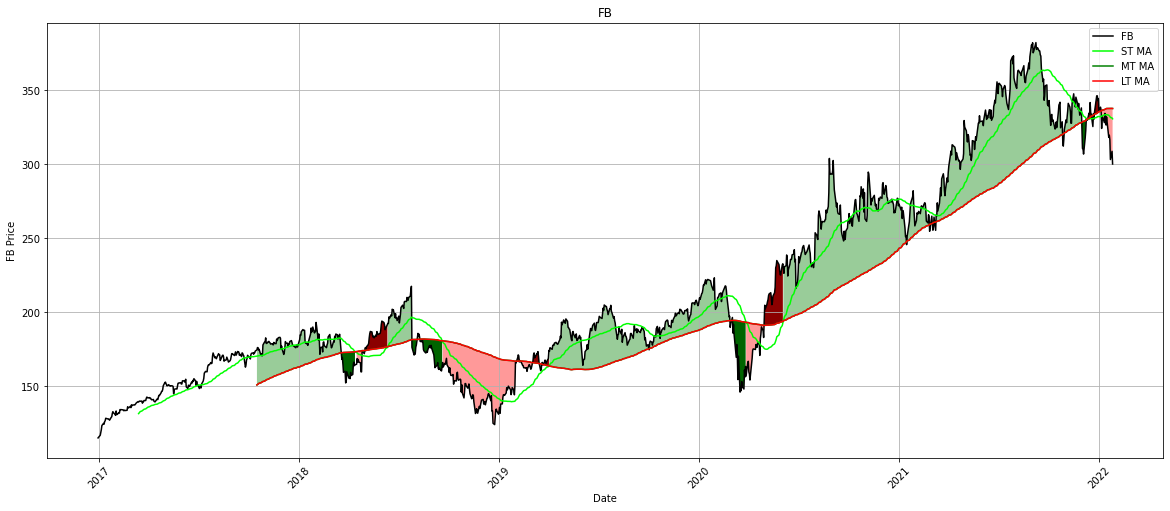

In [9]:
# CHAPTER 5: Regime Definition 
    
rg=lo=hi=slo=shi=clg=flr=rg_ch = None
lt_lo = lt_hi = st_lo = st_hi = 0
_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

mav = [50, 200, 200]
ma_st,ma_mt,ma_lt = [df[_c].rolling(mav[t]).mean() for t in range(len(mav))]

graph_regime_combo(ticker,df,_c,rg,lo,hi,slo,shi,clg,flr,rg_ch,ma_st,ma_mt,ma_lt,lt_lo,lt_hi,st_lo,st_hi)

#### Combine multiple regime methodologies into a visual graph
Plot: Softbank crossover imposed on the Turtle for dummies

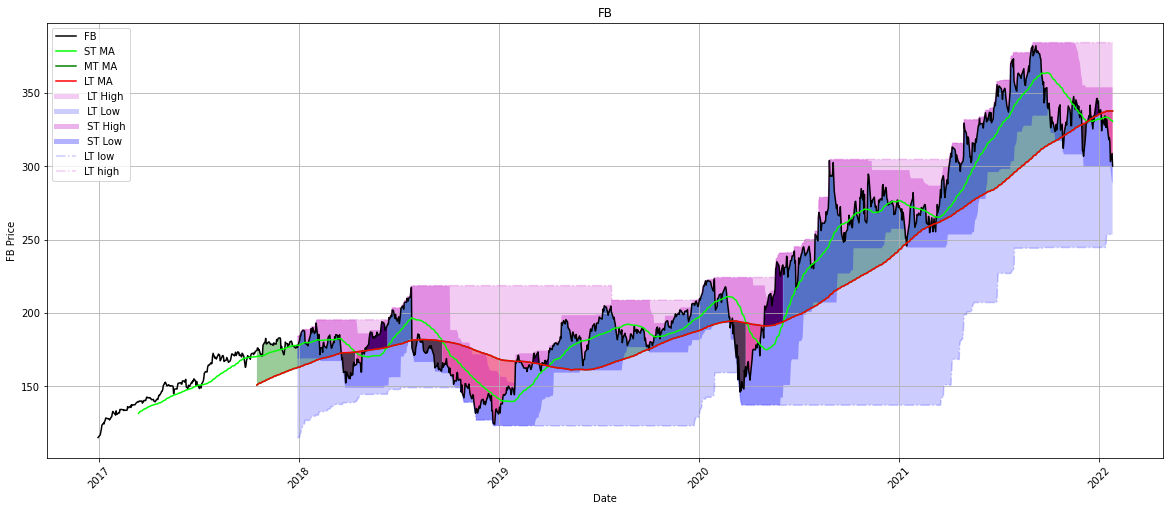

In [10]:
# CHAPTER 5: Regime Definition 

_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

mav = [50, 200, 200]
ma_st,ma_mt,ma_lt = [df[_c].rolling(mav[t]).mean() for t in range(len(mav))]

bo = [50, 252]
st_lo,lt_lo = [df[_l].rolling(bo[t]).min() for t in range(len(bo))]
st_hi,lt_hi = [df[_h].rolling(bo[t]).max() for t in range(len(bo))]

graph_regime_combo(ticker,df,_c,rg,lo,hi,slo,shi,clg,flr,rg_ch,ma_st,ma_mt,ma_lt,lt_lo,lt_hi,st_lo,st_hi)

### Triple moving average regime definition 
The graph_regime_combo accomodates up to 3 moving averages

Plot: Softbank triple moving average crossover

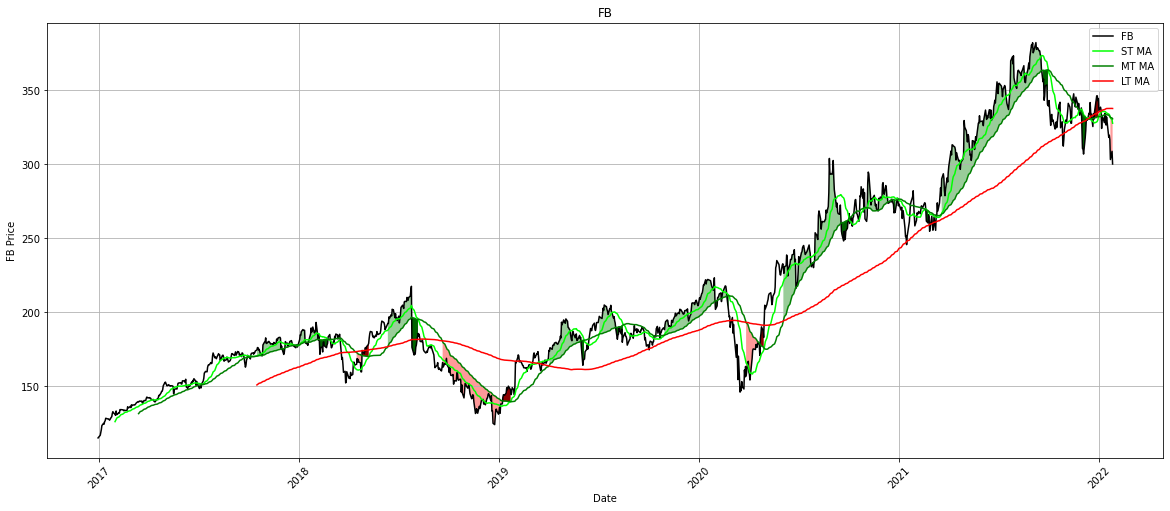

In [11]:
# CHAPTER 5: Regime Definition 

_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)
    
rg=lo=hi=slo=shi=clg=flr=rg_ch = None
lt_lo = lt_hi = st_lo = st_hi = 0

mav = [20, 50, 200]
ma_st,ma_mt,ma_lt = [df[_c].rolling(mav[t]).mean() for t in range(len(mav))]

graph_regime_combo(ticker,df,_c,rg,lo,hi,slo,shi,clg,flr,rg_ch,ma_st,ma_mt,ma_lt,lt_lo,lt_hi,st_lo,st_hi)

### Floor/Ceiling Methodology

That method is originally a variation on the higher high/higher low method. Unlike the higher high/higher low method, only one of the two following conditions has to be fulfilled for the regime to change:
   1. Bearish: A swing high has to be materially lower than the peak.
   2. Bullish: A swing low has to be materially higher than the bottom.

The swings do not even have to be consecutive for the regime to change. 

The floor/ceiling methodology is conceptually simple. It is however not easy to calculate. It is a two-step process:
   1. Swing detection
   2. Regime definition

Download raw data: SPY, a proxy Exchange-Traded Fund (ETF) for the S&P 500

In [12]:
# CHAPTER 5: Swing detection 
#ticker = 'XMR-USD' 

start= '2016-12-31'
end = None
raw_data = round(yf.download(tickers= ticker,start= start, end = end,interval = "1d",
                 group_by = 'column',auto_adjust = True, prepost = True, 
                 treads = True, proxy = None),2)

_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

[*********************100%***********************]  1 of 1 completed


#### Import scipy.signal

In [13]:

from scipy.signal import *

#### Historical swings
1. hilo_alternation: reduces a dataframe to a succession of highs & lows. 
    1. It eliminates same side consecutive highs and lows: highs are assigned a minus sign & lows a positive sign.
    2. It keeps the lowest value marks the extreme point.
2. historical_swings: This is the fractal part of the algorithm where we look for the same pattern while zooming out. Creates multiple level columns of highs & lows. At the end of every iteration the hilo df is reduced using the dropna method.


<AxesSubplot:title={'center':'FB'}, xlabel='Date'>

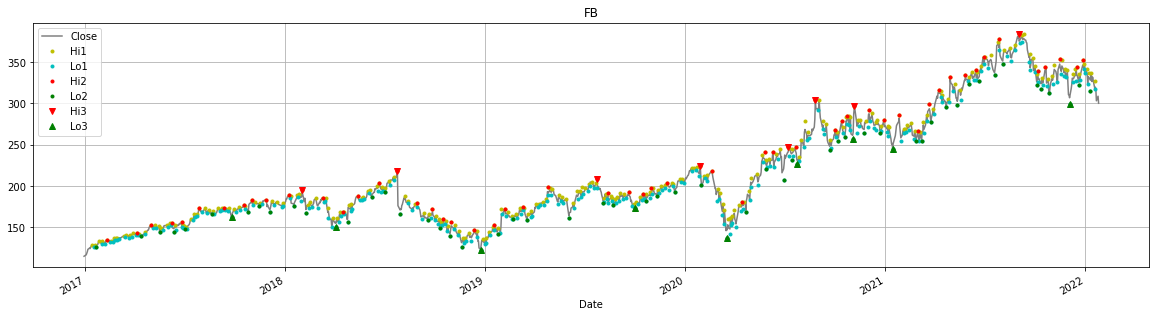

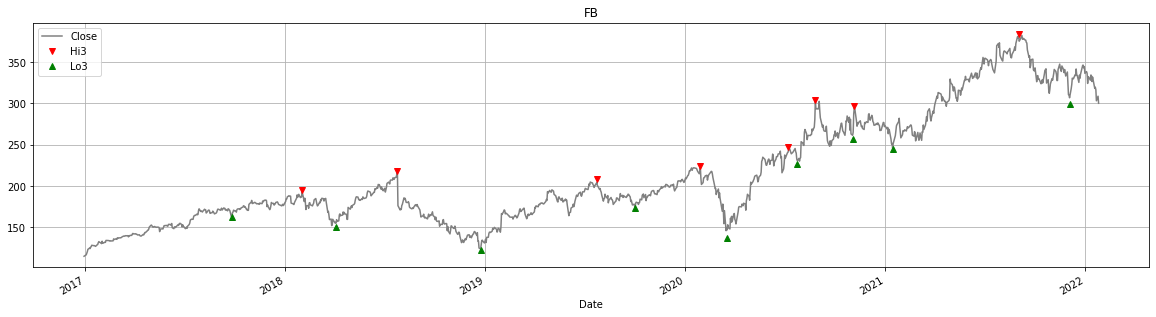

In [14]:
# CHAPTER 5: Regime Definition 

#### hilo_alternation(hilo, dist= None, hurdle= None) ####
def hilo_alternation(hilo, dist= None, hurdle= None):
    i=0    
    while (np.sign(hilo.shift(1)) == np.sign(hilo)).any(): # runs until duplicates are eliminated

        # removes swing lows > swing highs
        hilo.loc[(np.sign(hilo.shift(1)) != np.sign(hilo)) &  # hilo alternation test
                 (hilo.shift(1)<0) &  # previous datapoint:  high
                 (np.abs(hilo.shift(1)) < np.abs(hilo) )] = np.nan # high[-1] < low, eliminate low 

        hilo.loc[(np.sign(hilo.shift(1)) != np.sign(hilo)) &  # hilo alternation
                 (hilo.shift(1)>0) &  # previous swing: low
                 (np.abs(hilo ) < hilo.shift(1))] = np.nan # swing high < swing low[-1]

        # alternation test: removes duplicate swings & keep extremes
        hilo.loc[(np.sign(hilo.shift(1)) == np.sign(hilo)) & # same sign
                 (hilo.shift(1) < hilo )] = np.nan # keep lower one

        hilo.loc[(np.sign(hilo.shift(-1)) == np.sign(hilo)) & # same sign, forward looking 
                 (hilo.shift(-1) < hilo )] = np.nan # keep forward one

        # removes noisy swings: distance test
        if pd.notnull(dist):
            hilo.loc[(np.sign(hilo.shift(1)) != np.sign(hilo))&\
                 (np.abs(hilo + hilo.shift(1)).div(dist, fill_value=1)< hurdle)] = np.nan

        # reduce hilo after each pass
        hilo = hilo.dropna().copy() 
        i+=1
        if i == 4: # breaks infinite loop
            break 
        return hilo
#### hilo_alternation(hilo, dist= None, hurdle= None) ####

#### historical_swings(df,_o,_h,_l,_c, dist= None, hurdle= None) #### 
def historical_swings(df,_o,_h,_l,_c, dist= None, hurdle= None):
    
    reduction = df[[_o,_h,_l,_c]].copy() 
    reduction['avg_px'] = round(reduction[[_h,_l,_c]].mean(axis=1),2)
    highs = reduction['avg_px'].values
    lows = - reduction['avg_px'].values
    reduction_target =  len(reduction) // 100
#     print(reduction_target )

    n = 0
    while len(reduction) >= reduction_target: 
        highs_list = find_peaks(highs, distance = 1, width = 0)
        lows_list = find_peaks(lows, distance = 1, width = 0)
        hilo = reduction.iloc[lows_list[0]][_l].sub(reduction.iloc[highs_list[0]][_h],fill_value=0)

        # Reduction dataframe and alternation loop
        hilo_alternation(hilo, dist= None, hurdle= None)
        reduction['hilo'] = hilo

        # Populate reduction df
        n += 1        
        reduction[str(_h)[:2]+str(n)] = reduction.loc[reduction['hilo']<0 ,_h]
        reduction[str(_l)[:2]+str(n)] = reduction.loc[reduction['hilo']>0 ,_l]

        # Populate main dataframe
        df[str(_h)[:2]+str(n)] = reduction.loc[reduction['hilo']<0 ,_h]
        df[str(_l)[:2]+str(n)] = reduction.loc[reduction['hilo']>0 ,_l]
        
        # Reduce reduction
        reduction = reduction.dropna(subset= ['hilo'])
        reduction.fillna(method='ffill', inplace = True)
        highs = reduction[str(_h)[:2]+str(n)].values
        lows = -reduction[str(_l)[:2]+str(n)].values
        
        if n >= 9:
            break
            
    return df
#### historical_swings(df,_o,_h,_l,_c, dist= None, hurdle= None) ####


df = raw_data.copy()
_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)
# ohlc = ['Open','High','Low','Close']
# _o,_h,_l,_c = [ohlc[h] for h in range(len(ohlc))]
rhs = ['Hi1', 'Lo1','Hi2', 'Lo2', 'Hi3', 'Lo3']
rt_hi,rt_lo,_hi,_lo,shi,slo = [rhs[h] for h in range(len(rhs))]

df= historical_swings(df,_o,_h,_l,_c,dist= None, hurdle= None)

df[[_c,rt_hi,rt_lo,_hi,_lo,shi,slo ]].plot(
    style=['grey','y.', 'c.','r.', 'g.', 'rv', 'g^'],
    figsize=(20,5),grid=True, title = str.upper(ticker))
df[[_c,shi,slo]].plot(style=['grey','rv', 'g^'],
        figsize=(20,5),grid=True, title = str.upper(ticker))

#### Eliminate false positives

The cleanup_latest_swing() function removes false positives from the latest swing high and low.

The code takes the following steps:
1. The code identifies the latest swing low and high
2. Identify the most recent swing
3. If a false positive, assign N/A

<AxesSubplot:title={'center':'FB post-adjustment'}, xlabel='Date'>

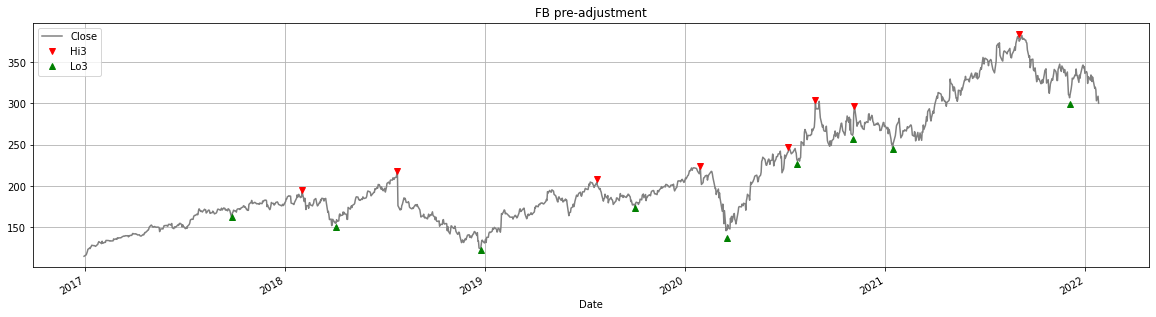

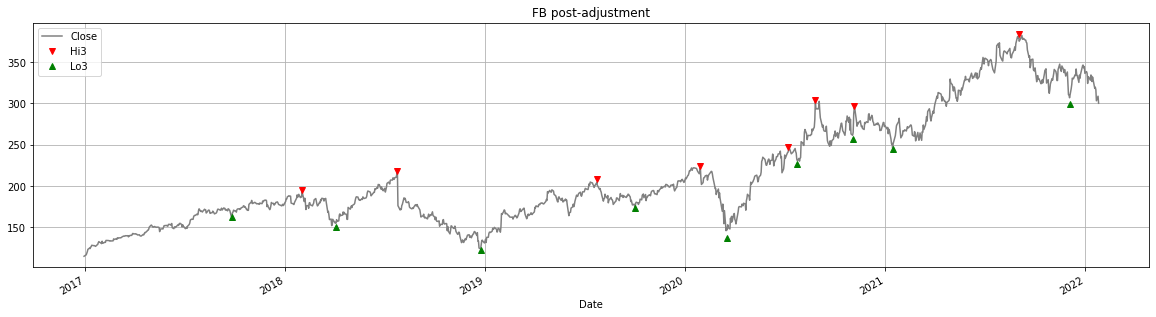

In [15]:
# CHAPTER 5: Regime Definition 

#### cleanup_latest_swing(df, shi, slo, rt_hi, rt_lo) ####
def cleanup_latest_swing(df, shi, slo, rt_hi, rt_lo): 
    '''
    removes false positives
    '''
    # latest swing
    shi_dt = df.loc[pd.notnull(df[shi]), shi].index[-1]
    s_hi = df.loc[pd.notnull(df[shi]), shi][-1]
    slo_dt = df.loc[pd.notnull(df[slo]), slo].index[-1] 
    s_lo = df.loc[pd.notnull(df[slo]), slo][-1] 
    len_shi_dt = len(df[:shi_dt])
    len_slo_dt = len(df[:slo_dt])
    

    # Reset false positives to np.nan
    for i in range(2):
        
        if (len_shi_dt > len_slo_dt) & ((df.loc[shi_dt:,rt_hi].max()> s_hi) | (s_hi<s_lo)):
            df.loc[shi_dt, shi] = np.nan
            len_shi_dt = 0
        elif (len_slo_dt > len_shi_dt) & ((df.loc[slo_dt:,rt_lo].min()< s_lo)| (s_hi<s_lo)):
            df.loc[slo_dt, slo] = np.nan 
            len_slo_dt = 0
        else:
            pass
    
    return df
#### cleanup_latest_swing(df, shi, slo, rt_hi, rt_lo) ####

# ohlc = ['Open','High','Low','Close'] 
# _o,_h,_l,_c = [ohlc[h] for h in range(len(ohlc))]

_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

df[[_c,shi,slo]].plot(style=['grey','rv', 'g^'],
        figsize=(20,5),grid=True, title = str.upper(ticker) + ' pre-adjustment')

df = cleanup_latest_swing(df, shi,slo,rt_hi,rt_lo)

df[[_c,shi,slo]].plot(style=['grey', 'rv', 'g^'],
        figsize=(20,5),grid=True, title = str.upper(ticker) + ' post-adjustment')

#### Instantiate arguments for the latest swing

This function calculates the variables that will be used in the next few functions. They are respectively:
   1. ud: Direction, up +1 , down -1
   2. bs: Base, either swing low or high
   3. bs_dt: The swing date. 
   4. _rt: The series name that will be used to detect swing. 
   5.  _swg: The series to assign the value; shi for swing high and slo for swing low.
   6. hh_ll: Either the lowest low or highest high.
   7. hh_ll_dt: The date of the highest high or lowest low.

In [16]:
# CHAPTER 5: Regime Definition 

#### latest_swings(df, shi, slo, rt_hi, rt_lo, _h, _l, _c, _vol) ####
def latest_swing_variables(df, shi, slo, rt_hi, rt_lo, _h, _l, _c):
    '''
    Latest swings dates & values
    '''
    shi_dt = df.loc[pd.notnull(df[shi]), shi].index[-1]
    slo_dt = df.loc[pd.notnull(df[slo]), slo].index[-1]
    s_hi = df.loc[pd.notnull(df[shi]), shi][-1]
    s_lo = df.loc[pd.notnull(df[slo]), slo][-1]
    
    if slo_dt > shi_dt: 
        swg_var = [1,s_lo,slo_dt,rt_lo,shi, df.loc[slo_dt:,_h].max(), df.loc[slo_dt:, _h].idxmax()]         
    elif shi_dt > slo_dt: 
        swg_var = [-1,s_hi,shi_dt,rt_hi,slo, df.loc[shi_dt:, _l].min(),df.loc[shi_dt:, _l].idxmin()]        
    else: 
        ud = 0
    ud, bs, bs_dt, _rt, _swg, hh_ll, hh_ll_dt = [swg_var[h] for h in range(len(swg_var))]   
        
    return ud, bs, bs_dt, _rt, _swg, hh_ll, hh_ll_dt
#### latest_swings(df, shi, slo, rt_hi, rt_lo, _h, _l, _c, _vol) ####
        
ud,bs,bs_dt,_rt,_swg,hh_ll,hh_ll_dt = latest_swing_variables(df,shi,slo,rt_hi,rt_lo,_h,_l,_c)

ud, bs, bs_dt, _rt, _swg, hh_ll, hh_ll_dt

(1,
 299.5,
 Timestamp('2021-12-03 00:00:00'),
 'Lo1',
 'Hi3',
 352.71,
 Timestamp('2021-12-28 00:00:00'))

#### Distance test 
The last swing is in two parts
1. distance test: sufficient distance from the last swing. This distance test acts as a filter. This function has two built-in tests:
    1. Distance expressed as a multiple of volatility. We use a measure of volatility Average True Range (ATR)
    2. Distance as a fixed percentage
2. Retest swing

In [17]:
# CHAPTER 5: Regime Definition 

#### test_distance(ud, bs, hh_ll, vlty, dist_vol, dist_pct) ####
def test_distance(ud,bs, hh_ll, dist_vol, dist_pct): 
    
    # priority: 1. Vol 2. pct 3. dflt
    if (dist_vol > 0):    
        distance_test = np.sign(abs(hh_ll - bs) - dist_vol)
    elif (dist_pct > 0):
        distance_test = np.sign(abs(hh_ll / bs - 1) - dist_pct)
    else:
        distance_test = np.sign(dist_pct)
        
    return int(max(distance_test,0) * ud)
#### test_distance(ud, bs, hh_ll, vlty, dist_vol, dist_pct) ####

#### ATR ####
def average_true_range(df, _h, _l, _c, n):
    '''
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:average_true_range_atr
    '''
    atr =  (df[_h].combine(df[_c].shift(), max) - df[_l].combine(df[_c].shift(), min)).rolling(window=n).mean()
    return atr

#### ATR ####

dist_vol = round(average_true_range(df,_h,_l,_c,n=63)[hh_ll_dt] * 2,2)
dist_pct = 0.05
_sign = test_distance(ud,bs, hh_ll, dist_vol, dist_pct)
_sign

1

#### Retest swing

This little function packs a surprisingly good punch. The logic is symmetrical for a swing high or low. 
1. Swing high:
    1. Detect the highest high from swing low
    2. From the highest high, identify the highest retest low
    3. When the price closes below the highest retest low: swing high = highest high.
2. Swing lows:
    1. Detect the lowest low from the swing high
    2. From the lowest low, identify the lowest retest high
    3. When the price closes above the lowest retest high: swing low = lowest low.
    
Note: retest resets automatically when finding a new highest high/lowest low

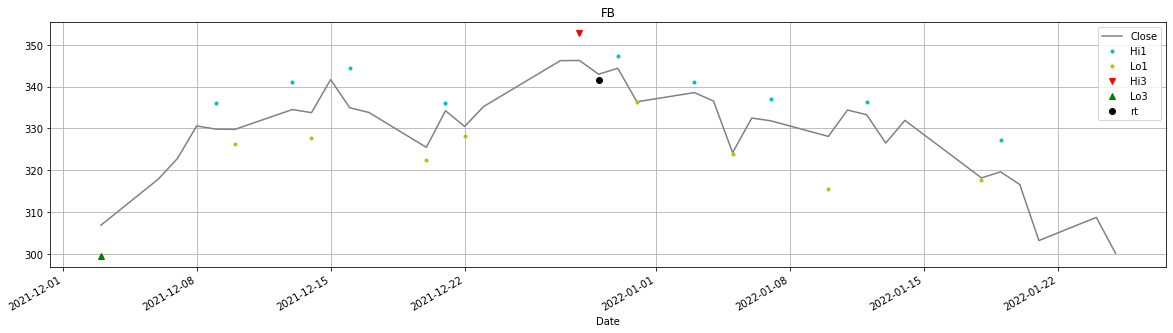

In [18]:
# CHAPTER 5: Regime Definition 

#### retest_swing(df, _sign, _rt, hh_ll_dt, hh_ll, _c, _swg) ####
def retest_swing(df, _sign, _rt, hh_ll_dt, hh_ll, _c, _swg):
    rt_sgmt = df.loc[hh_ll_dt:, _rt] 

    if (rt_sgmt.count() > 0) & (_sign != 0): # Retests exist and distance test met    
        if _sign == 1: # 
            rt_list = [rt_sgmt.idxmax(),rt_sgmt.max(),df.loc[rt_sgmt.idxmax():, _c].cummin()]
            
        elif _sign == -1:
            rt_list = [rt_sgmt.idxmin(), rt_sgmt.min(), df.loc[rt_sgmt.idxmin():, _c].cummax()]
        rt_dt,rt_hurdle, rt_px = [rt_list[h] for h in range(len(rt_list))]

        if str(_c)[0] == 'r':
            df.loc[rt_dt,'rrt'] = rt_hurdle
        elif str(_c)[0] != 'r':
            df.loc[rt_dt,'rt'] = rt_hurdle    

        if (np.sign(rt_px - rt_hurdle) == - np.sign(_sign)).any():
            df.at[hh_ll_dt, _swg] = hh_ll 
    return df
#### retest_swing(df, _sign, _rt, hh_ll_dt, hh_ll, _c, _swg) ####
df = retest_swing(df, _sign, _rt, hh_ll_dt, hh_ll, _c, _swg)
try:
    df['rt '] = df['rt'].fillna(method='ffill')
    df[bs_dt:][[_c, rt_hi, rt_lo,
        shi, slo,'rt']].plot(style=['grey', 'c.','y.',
        'rv', 'g^', 'ko'],figsize=(20,5),grid=True, title = str.upper(ticker))
except:
    df[bs_dt:][[_c, rt_hi, rt_lo,
        shi, slo]].plot(style=['grey', 'c.','y.',
        'rv', 'g^', 'ko'],figsize=(20,5),grid=True, title = str.upper(ticker))

#### Retracement swing
This function is an alternative to the retest method. Once the price has moved far enough in the opposite direction, then it is usually safe to conclude that a swing has been printed.
1. Calculate the retracement from the extreme value, either the minimum from the top or the maximum from the bottom
2. Distance test in units of volatility or in percentage points


<AxesSubplot:title={'center':'FB'}, xlabel='Date'>

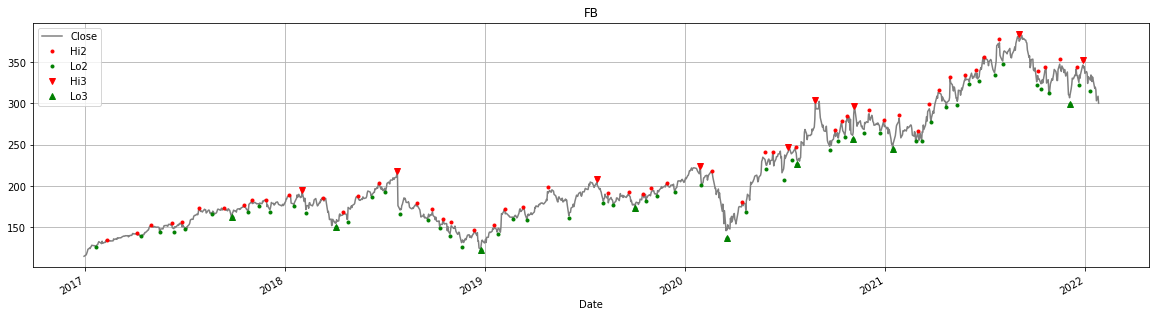

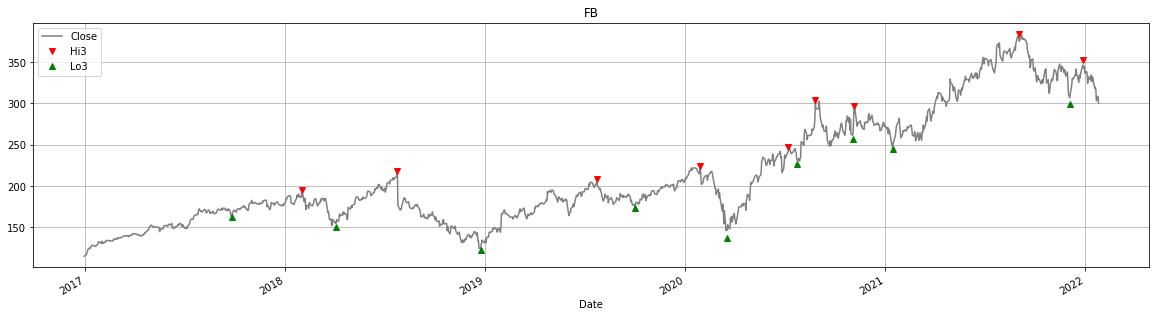

In [19]:
# CHAPTER 5: Regime Definition 

#### retracement_swing(df, _sign, _swg, _c, hh_ll_dt, hh_ll, vlty, retrace_vol, retrace_pct) ####
def retracement_swing(df, _sign, _swg, _c, hh_ll_dt, hh_ll, vlty, retrace_vol, retrace_pct):
    if _sign == 1: #
        retracement = df.loc[hh_ll_dt:, _c].min() - hh_ll

        if (vlty > 0) & (retrace_vol > 0) & ((abs(retracement / vlty) - retrace_vol) > 0):
            df.at[hh_ll_dt, _swg] = hh_ll
        elif (retrace_pct > 0) & ((abs(retracement / hh_ll) - retrace_pct) > 0):
            df.at[hh_ll_dt, _swg] = hh_ll

    elif _sign == -1:
        retracement = df.loc[hh_ll_dt:, _c].max() - hh_ll
        if (vlty > 0) & (retrace_vol > 0) & ((round(retracement / vlty ,1) - retrace_vol) > 0):
            df.at[hh_ll_dt, _swg] = hh_ll
        elif (retrace_pct > 0) & ((round(retracement / hh_ll , 4) - retrace_pct) > 0):
            df.at[hh_ll_dt, _swg] = hh_ll
    else:
        retracement = 0
    return df
#### retracement_swing(df, _sign, _swg, _c, hh_ll_dt, hh_ll, vlty, retrace_vol, retrace_pct) ####

# ohlc = ['Open','High','Low','Close'] 
# _o,_h,_l,_c = [ohlc[h] for h in range(len(ohlc))]
_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

vlty = round(average_true_range(df=df, _h= _h, _l= _l, _c= _c , n=63)[hh_ll_dt],2)
dist_vol = 5 * vlty
dist_pct = 0.05
_sign = test_distance(ud,bs, hh_ll, dist_vol, dist_pct)
df = retest_swing(df, _sign, _rt, hh_ll_dt, hh_ll, _c, _swg)
retrace_vol = 2.5 * vlty
retrace_pct = 0.05
df = retracement_swing(df,_sign,_swg,_c,hh_ll_dt,hh_ll, vlty,retrace_vol, retrace_pct)

df[[_c,_hi,_lo,shi,slo]].plot(
    style=['grey','r.', 'g.', 'rv', 'g^'],
    figsize=(20,5),grid=True, title = str.upper(ticker))

df[[_c,shi,slo]].plot(style=['grey','rv', 'g^'],
            figsize=(20,5),grid=True, title = str.upper(ticker))

### Relative function 
We saw this function in chapter 4

In [20]:
# CHAPTER 5: Regime Definition 

### RELATIVE
def relative(df,_o,_h,_l,_c, bm_df, bm_col, ccy_df, ccy_col, dgt, start, end,rebase=True):
    '''
    df: df
    bm_df, bm_col: df benchmark dataframe & column name
    ccy_df,ccy_col: currency dataframe & column name
    dgt: rounding decimal
    start/end: string or offset
    rebase: boolean rebase to beginning or continuous series
    '''
    # Slice df dataframe from start to end period: either offset or datetime
    df = df[start:end] 
    
    # inner join of benchmark & currency: only common values are preserved
    df = df.join(bm_df[[bm_col]],how='inner') 
    df = df.join(ccy_df[[ccy_col]],how='inner')

    # rename benchmark name as bm and currency as ccy
    df.rename(columns={bm_col:'bm', ccy_col:'ccy'},inplace=True)

    # Adjustment factor: calculate the scalar product of benchmark and currency
    df['bmfx'] = round(df['bm'].mul(df['ccy']),dgt).fillna(method='ffill')
    if rebase == True:
        df['bmfx'] = df['bmfx'].div(df['bmfx'][0])

    # Divide absolute price by fxcy adjustment factor and rebase to first value
    df['r' + str(_o)] = round(df[_o].div(df['bmfx']),dgt)
    df['r' + str(_h)] = round(df[_h].div(df['bmfx']),dgt)
    df['r'+ str(_l)] = round(df[_l].div(df['bmfx']),dgt)
    df['r'+ str(_c)] = round(df[_c].div(df['bmfx']),dgt)
    df = df.drop(['bm','ccy','bmfx'],axis=1)
    
    return (df)

### RELATIVE ###

#### S&P 500 vs Nasdaq via ETF

In [21]:
# CHAPTER 5: Regime Definition 

bm_df = pd.DataFrame()
bm_col = 'ONEQ'
ccy_col = 'USD'
dgt= 3
bm_df[bm_col] = round(yf.download(tickers= bm_col,start= start, end = end,interval = "1d",
                 group_by = 'column',auto_adjust = True, prepost = True, 
                 treads = True, proxy = None)['Close'],2)
bm_df[ccy_col] = 1

df = raw_data.copy()
# ohlc = ['Open','High','Low','Close']
# _o,_h,_l,_c = [ohlc[h] for h in range(len(ohlc))]
_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)
rhs = ['Hi1', 'Lo1','Hi2', 'Lo2', 'Hi3', 'Lo3']
rt_hi,rt_lo,_hi,_lo,shi,slo = [rhs[h] for h in range(len(rhs))]
df= relative(df,_o,_h,_l,_c, bm_df, bm_col, ccy_df=bm_df, 
            ccy_col=ccy_col, dgt= dgt, start=start, end= end,rebase=True)
    
for a in np.arange(0,2):  
    df = historical_swings(df,_o,_h,_l,_c, dist= None, hurdle= None)
    df = cleanup_latest_swing(df, shi, slo, rt_hi, rt_lo)
    ud, bs, bs_dt, _rt, _swg, hh_ll, hh_ll_dt = latest_swing_variables(df, shi, slo,rt_hi,rt_lo,_h, _l,_c)
    vlty = round(average_true_range(df=df, _h= _h, _l= _l, _c= _c , n=63)[hh_ll_dt],2)
    dist_vol = 5 * vlty
    dist_pct = 0.05
    _sign = test_distance(ud,bs, hh_ll, dist_vol, dist_pct)
    df = retest_swing(df, _sign, _rt, hh_ll_dt, hh_ll, _c, _swg)
    retrace_vol = 2.5 * vlty
    retrace_pct = 0.05
    df = retracement_swing(df,_sign,_swg,_c,hh_ll_dt,hh_ll, vlty,retrace_vol, retrace_pct)
    _o,_h,_l,_c = lower_upper_OHLC(df,relative = True)
    rrhs = ['rH1', 'rL1','rH2', 'rL2', 'rH3', 'rL3']
    rt_hi,rt_lo,_hi,_lo,shi,slo = [rrhs[h] for h in range(len(rrhs))]



[*********************100%***********************]  1 of 1 completed


#### Plot  data

<AxesSubplot:title={'center':'FB vs ONEQ'}, xlabel='Date'>

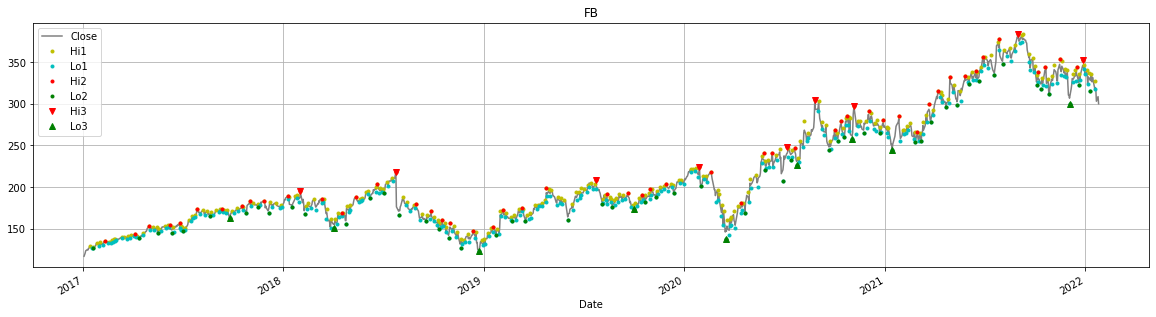

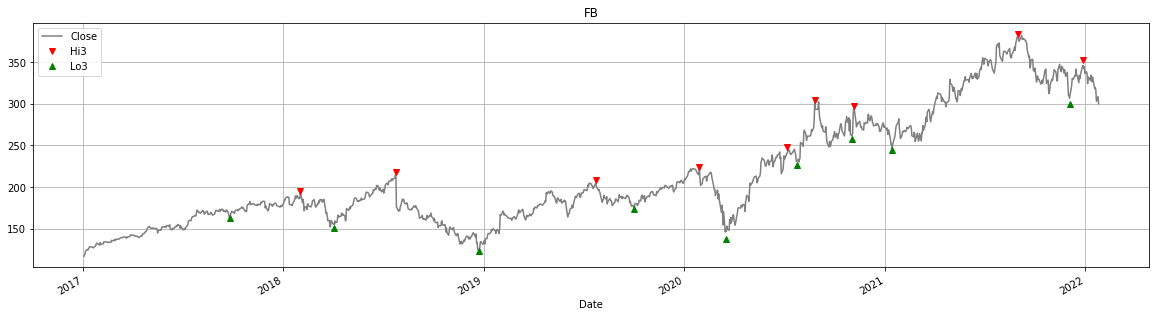

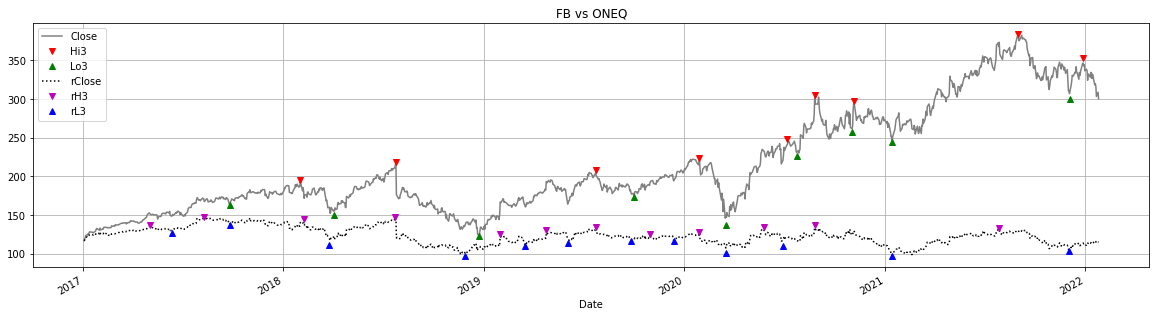

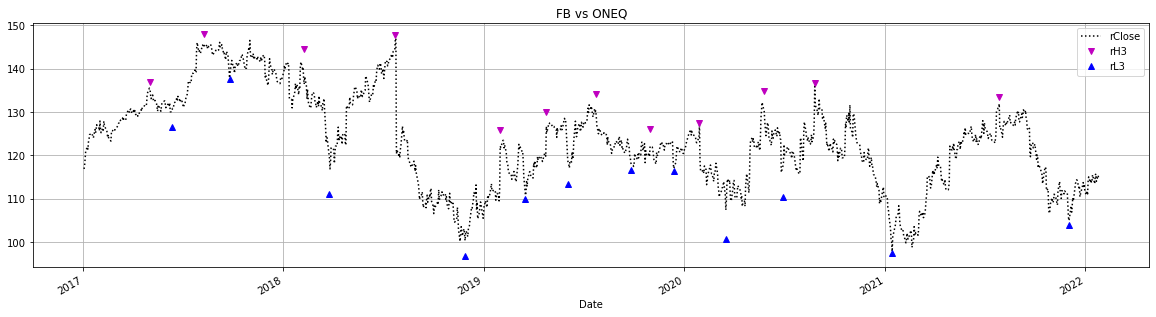

In [22]:
# CHAPTER 5: Regime Definition 

_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

df[['Close','Hi1','Lo1','Hi2','Lo2','Hi3','Lo3']].plot(style=['grey','y.', 'c.','r.', 'g.', 'rv', 'g^'],
    figsize=(20,5),grid=True, title = str.upper(ticker))

df[['Close','Hi3','Lo3']].plot(
    style=['grey', 'rv', 'g^'],
    figsize=(20,5),grid=True, title = str.upper(ticker))

df[['Close','Hi3','Lo3','rClose','rH3','rL3']].plot(
    style=['grey','rv', 'g^','k:','mv','b^'],
            figsize=(20,5),grid=True, title = str.upper(ticker)+' vs '+str.upper(bm_col))

df[['rClose','rH3','rL3']].plot(
    style=['k:','mv','b^'],
            figsize=(20,5),grid=True, title = str.upper(ticker)+' vs '+str.upper(bm_col))

### Regime Definition


The formula is a z-score of the distance from peak/trough to subsequent swing highs/lows. The z-score is a delta expressed in units of volatility (ATR, standard deviations, realized or implied). 
1. Classic bull regime:
    1. Look for a ceiling: The search window starts from the floor
    2. z-score: ceiling_test = (swing_high[i]-top)/stdev[i]
    3. If ceiling_test < x standard deviations, the regime has turned bearish
2. Classic bear regime:
    1. Look for a floor: The search window starts from the ceiling
    2. z-score: floor_test = (swing_low[i]-bottom)/stdev[i]
    3. If floor_test > x standard deviations, the regime has turned bullish
3. Exception handling: This happens when price penetrates discovery swings:
    1. Initial penetration: 
        1. For a floor, we look for the lowest low since the discovery swing low. 
        2. For a ceiling, we look for the highest high since the discovery swing high.
    2. The regime is reset to the previously dominant one. 
    3. Reversion: Sometimes prices bounce around. This ensures the regime responds well to randomness.
    4. Once the loop is over, columns are populated.

In [23]:
# CHAPTER 5: Regime Definition 

#### regime_floor_ceiling(df, hi,lo,cl, slo, shi,flr,clg,rg,rg_ch,stdev,threshold) ####
def regime_floor_ceiling(df, _h,_l,_c,slo, shi,flr,clg,rg,rg_ch,stdev,threshold):
    # Lists instantiation
    threshold_test,rg_ch_ix_list,rg_ch_list = [],[], []
    floor_ix_list, floor_list, ceiling_ix_list, ceiling_list = [],[],[],[]

    ### Range initialisation to 1st swing
    floor_ix_list.append(df.index[0])
    ceiling_ix_list.append(df.index[0])
    
    ### Boolean variables
    ceiling_found = floor_found = breakdown = breakout = False

    ### Swings lists
    swing_highs = list(df[pd.notnull(df[shi])][shi])
    swing_highs_ix = list(df[pd.notnull(df[shi])].index)
    swing_lows = list(df[pd.notnull(df[slo])][slo])
    swing_lows_ix = list(df[pd.notnull(df[slo])].index)
    loop_size = np.maximum(len(swing_highs),len(swing_lows))

    ### Loop through swings
    for i in range(loop_size): 

        ### asymetric swing list: default to last swing if shorter list
        try:
            s_lo_ix = swing_lows_ix[i]
            s_lo = swing_lows[i]
        except:
            s_lo_ix = swing_lows_ix[-1]
            s_lo = swing_lows[-1]

        try:
            s_hi_ix = swing_highs_ix[i]
            s_hi = swing_highs[i]
        except:
            s_hi_ix = swing_highs_ix[-1]
            s_hi = swing_highs[-1]

        swing_max_ix = np.maximum(s_lo_ix,s_hi_ix) # latest swing index

        ### CLASSIC CEILING DISCOVERY
        if (ceiling_found == False):   
            top = df[floor_ix_list[-1] : s_hi_ix][_h].max()
            ceiling_test = round((s_hi - top) / stdev[s_hi_ix] ,1)  

            ### Classic ceiling test
            if ceiling_test <= -threshold: 
                ### Boolean flags reset
                ceiling_found = True 
                floor_found = breakdown = breakout = False                
                threshold_test.append(ceiling_test)

                ### Append lists
                ceiling_list.append(top)
                ceiling_ix_list.append(df[floor_ix_list[-1]: s_hi_ix][_h].idxmax())           
                rg_ch_ix_list.append(s_hi_ix)
                rg_ch_list.append(s_hi) 

        ### EXCEPTION HANDLING: price penetrates discovery swing
        ### 1. if ceiling found, calculate regime since rg_ch_ix using close.cummin
        elif (ceiling_found == True):
            close_high = df[rg_ch_ix_list[-1] : swing_max_ix][_c].cummax()
            df.loc[rg_ch_ix_list[-1] : swing_max_ix, rg] = np.sign(close_high - rg_ch_list[-1])

            ### 2. if price.cummax penetrates swing high: regime turns bullish, breakout
            if (df.loc[rg_ch_ix_list[-1] : swing_max_ix, rg] >0).any():
                ### Boolean flags reset
                floor_found = ceiling_found = breakdown = False
                breakout = True

        ### 3. if breakout, test for bearish pullback from highest high since rg_ch_ix
        if (breakout == True):
            brkout_high_ix = df.loc[rg_ch_ix_list[-1] : swing_max_ix, _c].idxmax()
            brkout_low = df[brkout_high_ix : swing_max_ix][_c].cummin()
            df.loc[brkout_high_ix : swing_max_ix, rg] = np.sign(brkout_low - rg_ch_list[-1])


        ### CLASSIC FLOOR DISCOVERY        
        if (floor_found == False): 
            bottom = df[ceiling_ix_list[-1] : s_lo_ix][_l].min()
            floor_test = round((s_lo - bottom) / stdev[s_lo_ix],1)

            ### Classic floor test
            if (floor_test >= threshold): 
                
                ### Boolean flags reset
                floor_found = True
                ceiling_found = breakdown = breakout = False
                threshold_test.append(floor_test)

                ### Append lists
                floor_list.append(bottom)
                floor_ix_list.append(df[ceiling_ix_list[-1] : s_lo_ix][_l].idxmin())           
                rg_ch_ix_list.append(s_lo_ix)
                rg_ch_list.append(s_lo)

        ### EXCEPTION HANDLING: price penetrates discovery swing
        ### 1. if floor found, calculate regime since rg_ch_ix using close.cummin
        elif(floor_found == True):    
            close_low = df[rg_ch_ix_list[-1] : swing_max_ix][_c].cummin()
            df.loc[rg_ch_ix_list[-1] : swing_max_ix, rg] = np.sign(close_low - rg_ch_list[-1])

            ### 2. if price.cummin penetrates swing low: regime turns bearish, breakdown
            if (df.loc[rg_ch_ix_list[-1] : swing_max_ix, rg] <0).any():
                floor_found = floor_found = breakout = False
                breakdown = True                

        ### 3. if breakdown,test for bullish rebound from lowest low since rg_ch_ix
        if (breakdown == True):
            brkdwn_low_ix = df.loc[rg_ch_ix_list[-1] : swing_max_ix, _c].idxmin() # lowest low  
            breakdown_rebound = df[brkdwn_low_ix : swing_max_ix][_c].cummax() # rebound
            df.loc[brkdwn_low_ix : swing_max_ix, rg] = np.sign(breakdown_rebound - rg_ch_list[-1])
#             breakdown = False
#             breakout = True  

    ### POPULATE FLOOR,CEILING, RG CHANGE COLUMNS
    df.loc[floor_ix_list[1:], flr] = floor_list
    df.loc[ceiling_ix_list[1:], clg] = ceiling_list
    df.loc[rg_ch_ix_list, rg_ch] = rg_ch_list
    df[rg_ch] = df[rg_ch].fillna(method='ffill')

    ### regime from last swing
    df.loc[swing_max_ix:,rg] = np.where(ceiling_found, # if ceiling found, highest high since rg_ch_ix
                                         np.sign(df[swing_max_ix:][_c].cummax() - rg_ch_list[-1]),
                                        np.where(floor_found, # if floor found, lowest low since rg_ch_ix
                                                 np.sign(df[swing_max_ix:][_c].cummin() - rg_ch_list[-1]),
                                                 np.sign(df[swing_max_ix:][_c].rolling(5).mean() - rg_ch_list[-1]))) 
    df[rg] = df[rg].fillna(method='ffill')
#     df[rg+'_no_fill'] = df[rg]
    return df

#### regime_floor_ceiling(df, hi,lo,cl, slo, shi,flr,clg,rg,rg_ch,stdev,threshold) ####

#### Plot data

<AxesSubplot:title={'center':'FB'}, xlabel='Date'>

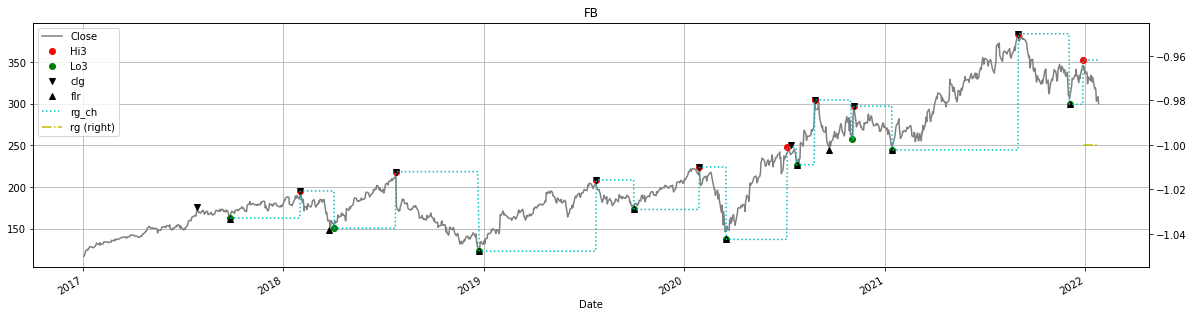

In [24]:
# CHAPTER 5: Regime Definition 
_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

stdev = df[_c].rolling(63).std(ddof=0)
rg_val = ['Hi3','Lo3','flr','clg','rg','rg_ch',1.5]
slo, shi,flr,clg,rg,rg_ch,threshold = [rg_val[s] for s in range(len(rg_val))]
df = regime_floor_ceiling(df,_h,_l,_c,slo, shi,flr,clg,rg,rg_ch,stdev,threshold)

df[['Close','Hi3', 'Lo3','clg','flr','rg_ch','rg']].plot(style=['grey', 'ro', 'go', 'kv', 'k^','c:','y-.'], 
                        secondary_y= ['rg'],figsize=(20,5),grid=True, title = str.upper(ticker))

<AxesSubplot:title={'center':'FB'}, xlabel='Date'>

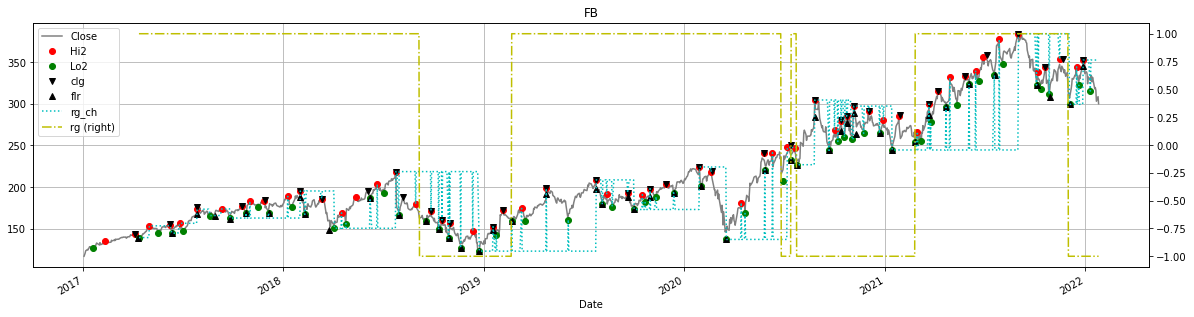

In [25]:
# CHAPTER 5: Regime Definition 
_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

stdev = df[_c].rolling(63).std(ddof=0)
rg_val = ['Hi2','Lo2','flr','clg','rg','rg_ch',0.5]
slo, shi,flr,clg,rg,rg_ch,threshold = [rg_val[s] for s in range(len(rg_val))]
df = regime_floor_ceiling(df,_h,_l,_c,slo, shi,flr,clg,rg,rg_ch,stdev,threshold)

df[['Close','Hi2', 'Lo2','clg','flr','rg_ch','rg']].plot(
    style=['grey', 'ro', 'go', 'kv', 'k^','c:','y-.'], 
                        secondary_y= ['rg'],figsize=(20,5),grid=True, title = str.upper(ticker))

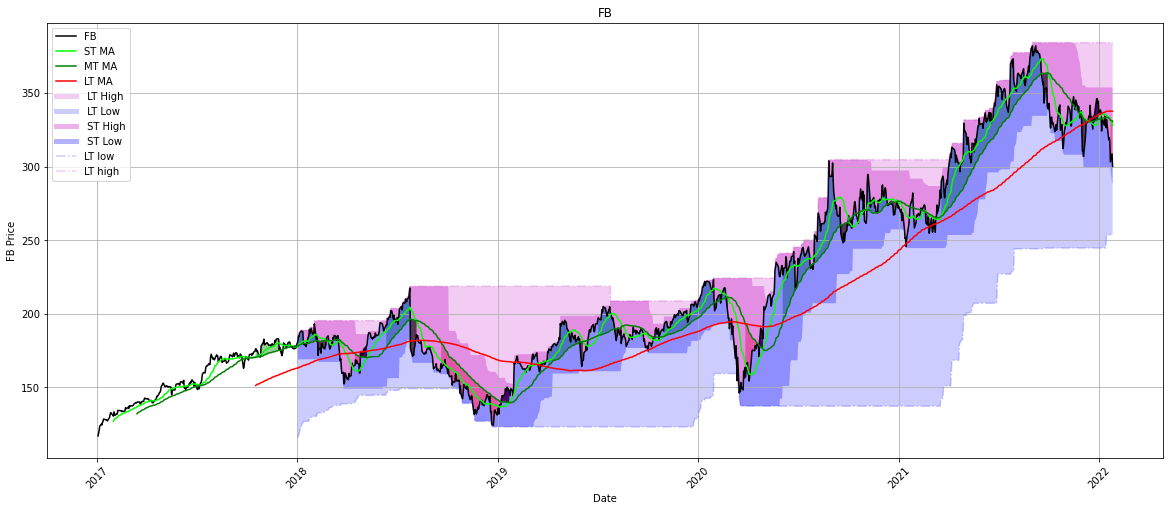

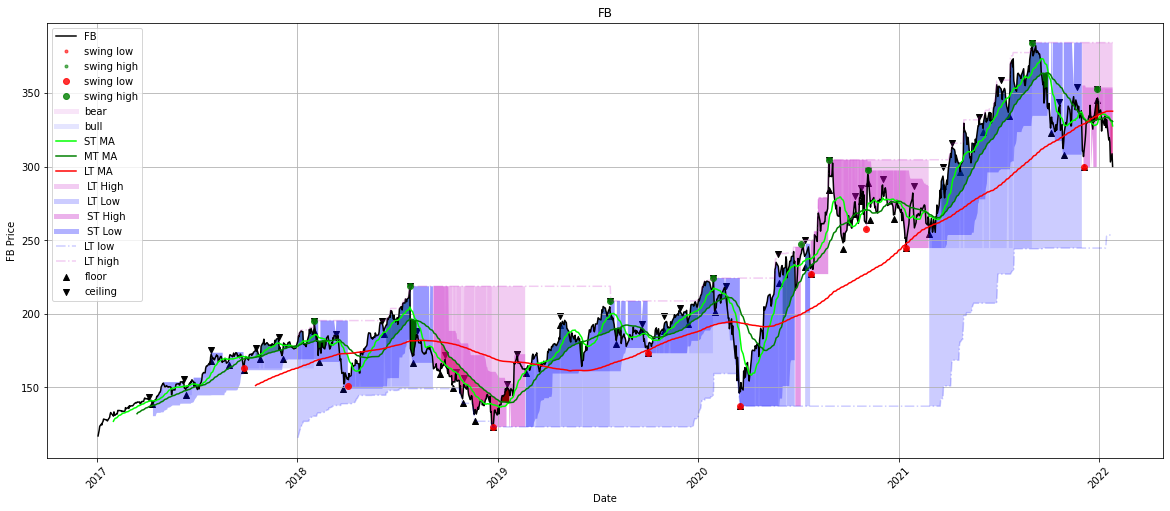

In [26]:
# CHAPTER 5: Regime Definition 

# ohlc = ['Open','High','Low','Close']
# _o,_h,_l,_c = [ohlc[h] for h in range(len(ohlc))]
_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)

mav = [20, 50, 200]
ma_st,ma_mt,ma_lt = [df[_c].rolling(mav[t]).mean() for t in range(len(mav))]

bo = [50, 252]
st_lo,lt_lo = [df[_l].rolling(bo[t]).min() for t in range(len(bo))]
st_hi,lt_hi = [df[_h].rolling(bo[t]).max() for t in range(len(bo))]

rg=lo=hi=slo=shi=clg=flr=rg_ch = None
graph_regime_combo(ticker,df,_c,rg,lo,hi,slo,shi,clg,flr,rg_ch,ma_st,ma_mt,ma_lt,lt_lo,lt_hi,st_lo,st_hi)

rg_combo = ['Close','rg','Lo3','Hi3','Lo3','Hi3','clg','flr','rg_ch']
_c,rg,lo,hi,slo,shi,clg,flr,rg_ch =[rg_combo[r] for r in range(len(rg_combo)) ]

graph_regime_combo(ticker,df,_c,rg,lo,hi,slo,shi,clg,flr,rg_ch,ma_st,ma_mt,ma_lt,lt_lo,lt_hi,st_lo,st_hi)

#### Wells Fargo 
1. Download benchmark & ticker data
2. Process relative function
3. Plot Close and relative Close

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'FB Relative & Absolute'}, xlabel='Date'>

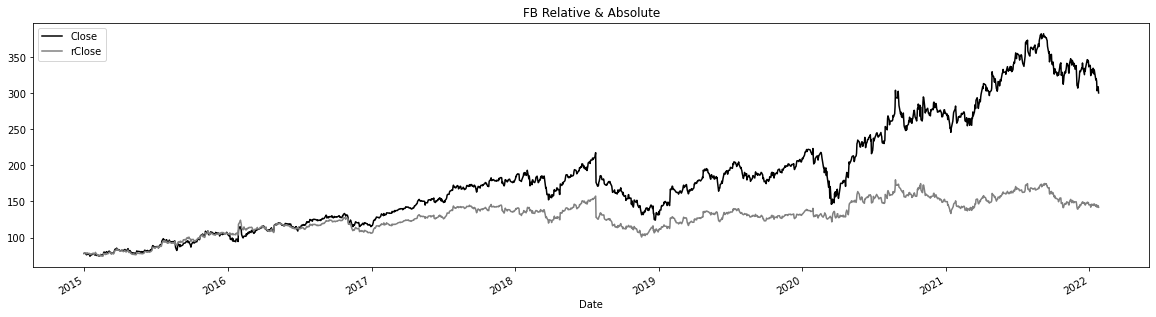

In [27]:
# CHAPTER 5: Regime Definition 

params = ['2014-12-31', None, 63, 0.05, 0.05, 1.5, 2]
start, end, vlty_n,dist_pct,retrace_pct,threshold,dgt= [params[h] for h in range(len(params))]

rel_var = ['^GSPC','SP500', 'USD']
bm_ticker, bm_col, ccy_col = [rel_var[h] for h in range(len(rel_var))]
bm_df = pd.DataFrame()
bm_df[bm_col] = round(yf.download(tickers= bm_ticker,start= start, end = end,interval = "1d",
                 group_by = 'column',auto_adjust = True, prepost = True, 
                 treads = True, proxy = None)['Close'],dgt)
bm_df[ccy_col] = 1

#ticker = 'WFC'
df = round(yf.download(tickers= ticker,start= start, end = end,interval = "1d",
                 group_by = 'column',auto_adjust = True, prepost = True, 
                 treads = True, proxy = None),2)
# ohlc = ['Open','High','Low','Close']
# _o,_h,_l,_c = [ohlc[h] for h in range(len(ohlc))]
_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)
df= relative(df=df,_o=_o,_h=_h,_l=_l,_c=_c, bm_df=bm_df, bm_col= bm_col, ccy_df=bm_df, 
            ccy_col=ccy_col, dgt= dgt, start=start, end= end,rebase=True)

df[['Close','rClose']].plot(figsize=(20,5),style=['k','grey'],
                           title = str.upper(ticker)+ ' Relative & Absolute')


#### Calculate floor/ceiling regime in absolute and relative

In [28]:
# CHAPTER 5: Regime Definition 

swing_val = ['rg','Lo1','Hi1','Lo3','Hi3','clg','flr','rg_ch']
rg,rt_lo,rt_hi,slo,shi,clg,flr,rg_ch = [swing_val[s] for s in range(len(swing_val))]

for a in np.arange(0,2):    
    df = round(historical_swings(df,_o,_h,_l,_c, dist= None, hurdle= None),2)
    df = cleanup_latest_swing(df,shi,slo,rt_hi,rt_lo)
    ud, bs, bs_dt, _rt, _swg, hh_ll, hh_ll_dt = latest_swing_variables(df, 
            shi,slo,rt_hi,rt_lo,_h,_l, _c)
    vlty = round(average_true_range(df,_h,_l,_c, n= vlty_n)[hh_ll_dt],2)
    dist_vol = 5 * vlty
    _sign = test_distance(ud,bs, hh_ll, dist_vol, dist_pct)
    df = retest_swing(df, _sign, _rt, hh_ll_dt, hh_ll, _c, _swg)
    retrace_vol = 2.5 * vlty
    df = retracement_swing(df, _sign, _swg, _c, hh_ll_dt, hh_ll, vlty, retrace_vol, retrace_pct)
    stdev = df[_c].rolling(vlty_n).std(ddof=0)
    df = regime_floor_ceiling(df,_h,_l,_c,slo, shi,flr,clg,rg,rg_ch,stdev,threshold)    
    
    _o,_h,_l,_c = lower_upper_OHLC(df,relative = True)
    rswing_val = ['rrg','rL1','rH1','rL3','rH3','rclg','rflr','rrg_ch']
    rg,rt_lo,rt_hi,slo,shi,clg,flr,rg_ch = [rswing_val[s] for s in range(len(rswing_val))]



#### Plot data

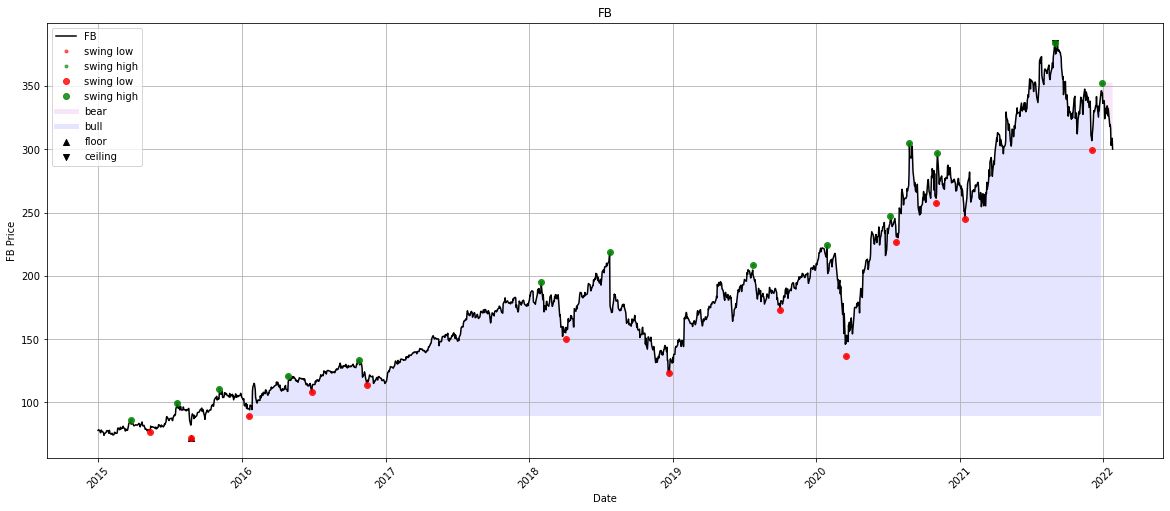

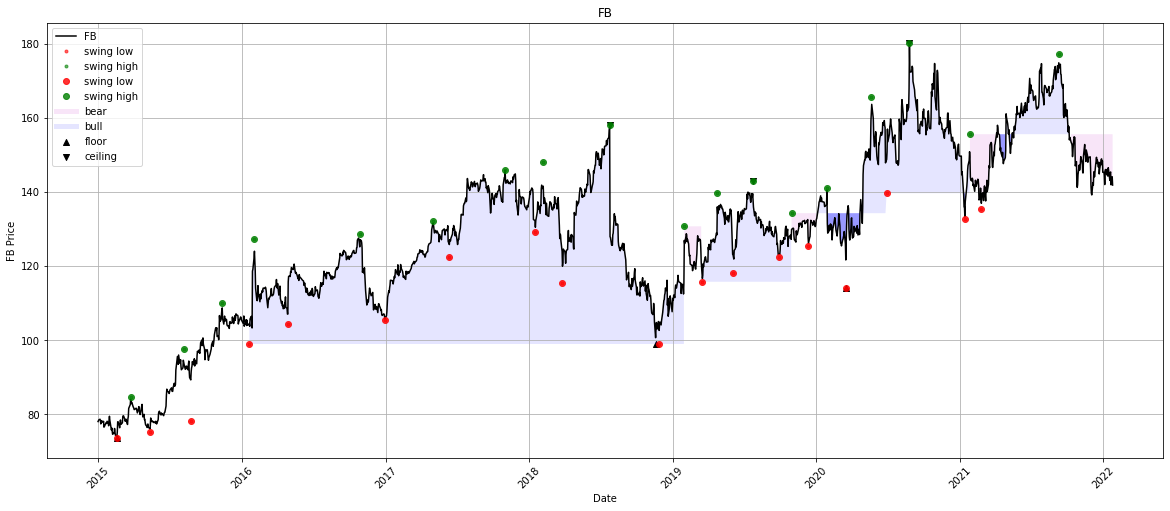

In [29]:
# CHAPTER 5: Regime Definition 
ma_st = ma_mt = ma_lt = lt_lo = lt_hi = st_lo = st_hi = 0

rg_combo = ['Close','rg','Lo3','Hi3','Lo3','Hi3','clg','flr','rg_ch']
_c,rg,lo,hi,slo,shi,clg,flr,rg_ch =[rg_combo[r] for r in range(len(rg_combo)) ]
graph_regime_combo(ticker,df,_c,rg,lo,hi,slo,shi,clg,flr,rg_ch,ma_st,ma_mt,ma_lt,lt_lo,lt_hi,st_lo,st_hi)

rrg_combo = ['rClose','rrg','rL3','rH3','rL3','rH3','rclg','rflr','rrg_ch']
_c,rg,lo,hi,slo,shi,clg,flr,rg_ch =[rrg_combo[r] for r in range(len(rrg_combo)) ]
graph_regime_combo(ticker,df,_c,rg,lo,hi,slo,shi,clg,flr,rg_ch,ma_st,ma_mt,ma_lt,lt_lo,lt_hi,st_lo,st_hi)

<AxesSubplot:title={'center':'FB Relative & Absolute'}, xlabel='Date'>

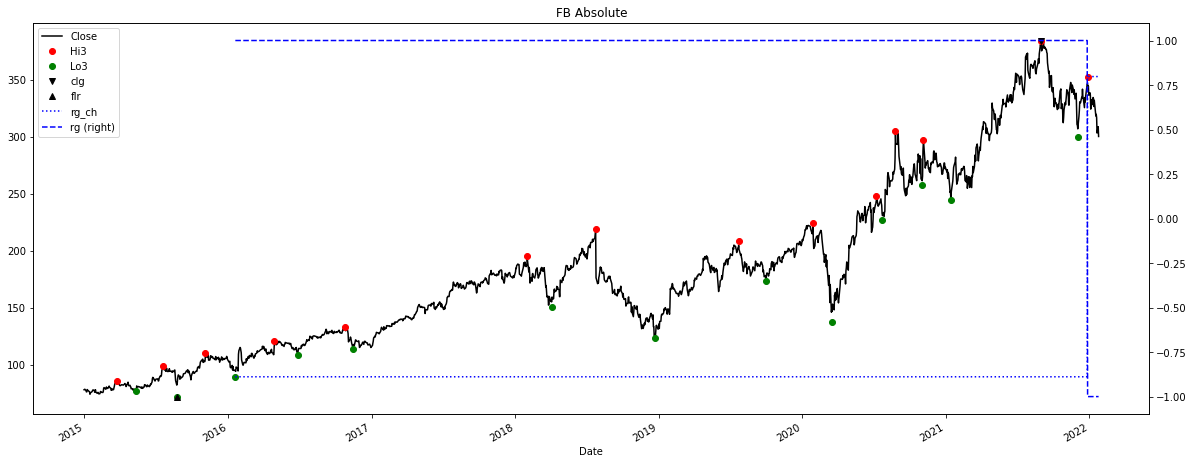

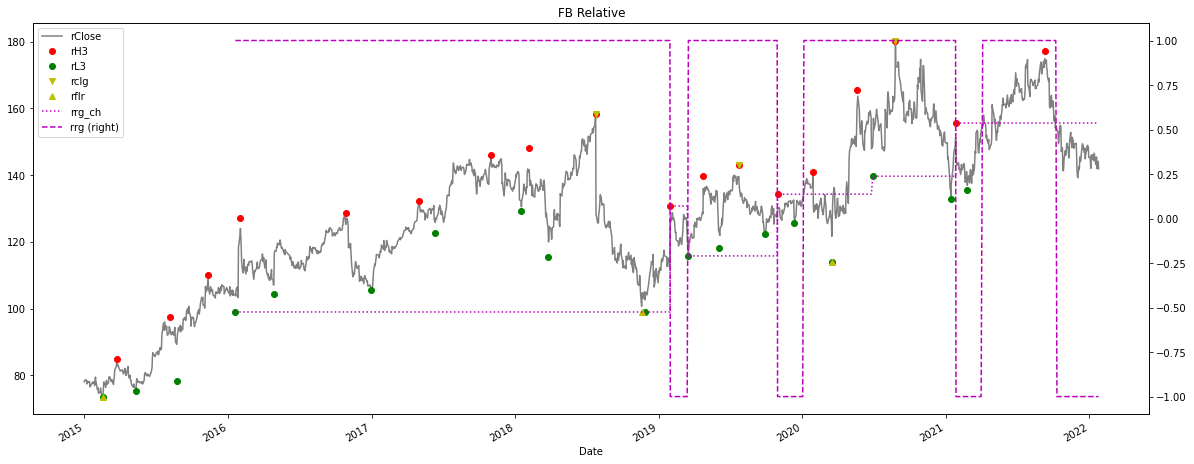

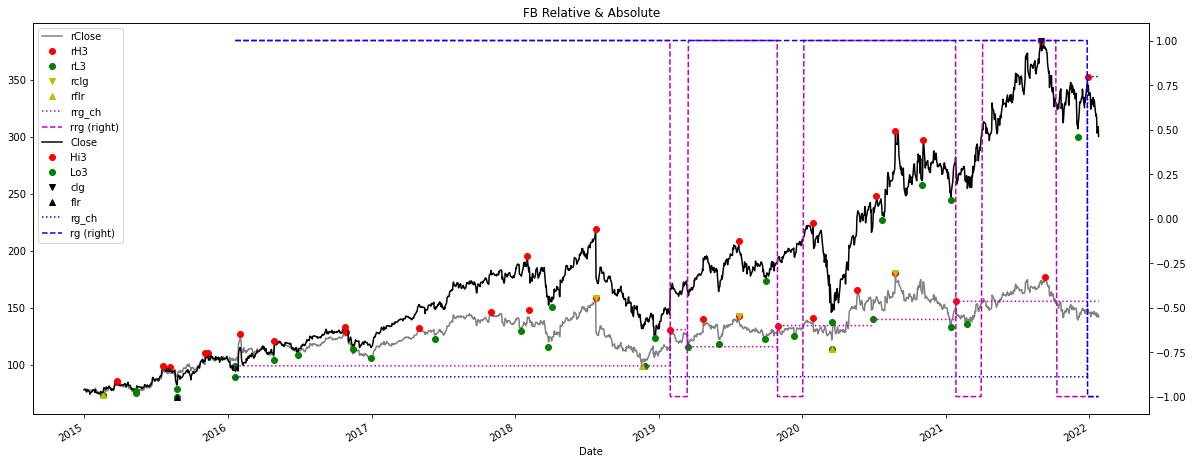

In [30]:
# CHAPTER 5: Regime Definition 
plot_abs_cols = ['Close','Hi3', 'Lo3','clg','flr','rg_ch','rg']
plot_abs_style = ['k', 'ro', 'go', 'kv', 'k^','b:','b--']
y2_abs = ['rg']
plot_rel_cols = ['rClose','rH3', 'rL3','rclg','rflr','rrg_ch','rrg']
plot_rel_style = ['grey', 'ro', 'go', 'yv', 'y^','m:','m--']
y2_rel = ['rrg']
df[plot_abs_cols].plot(secondary_y= y2_abs,figsize=(20,8),
            title = str.upper(ticker)+ ' Absolute',# grid=True,
            style=plot_abs_style)

df[plot_rel_cols].plot(secondary_y=y2_rel,figsize=(20,8),
            title = str.upper(ticker)+ ' Relative',# grid=True,
            style=plot_rel_style)

df[plot_rel_cols + plot_abs_cols].plot(secondary_y=y2_rel + y2_abs,figsize=(20,8),
            title = str.upper(ticker)+ ' Relative & Absolute',# grid=True,
            style=plot_rel_style + plot_abs_style)